In [6]:
import numpy as np
import numpy.linalg as la
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

%matplotlib inline
plt.rcParams["figure.figsize"] = [12, 8]

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Линейная регрессия

In [3]:
x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1)
df = pd.DataFrame(np.hstack([x, y]), columns=['x', 'y'])
df.head()

,x,y
0,1.170194,7.871867
1,1.377714,10.088556
2,0.268598,4.905628
3,1.977105,9.691653
4,1.917688,6.550306


In [4]:
df.shape

(100, 2)

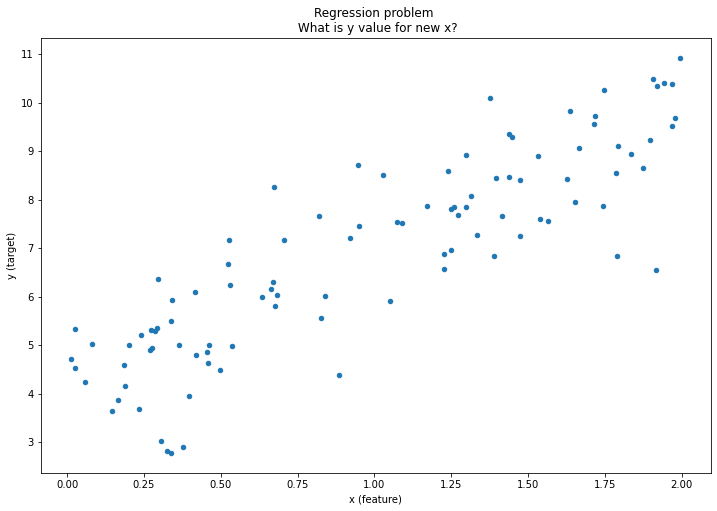

In [7]:
#df.plot.scatter('x', 'y', figsize=(12,8))
df.plot.scatter('x', 'y')
plt.title("Regression problem \n What is y value for new x?")
plt.xlabel("x (feature)")
plt.ylabel("y (target)");

## Парная регрессия

### Описание данных
$$ y = \beta_0 + \beta_1 x + \epsilon $$

### Предсказание 
$$ \hat{y} = \hat{\beta_0} + \hat{\beta_1} x $$

Построим случайную прямую. Насколько хорошо она описывает данные?

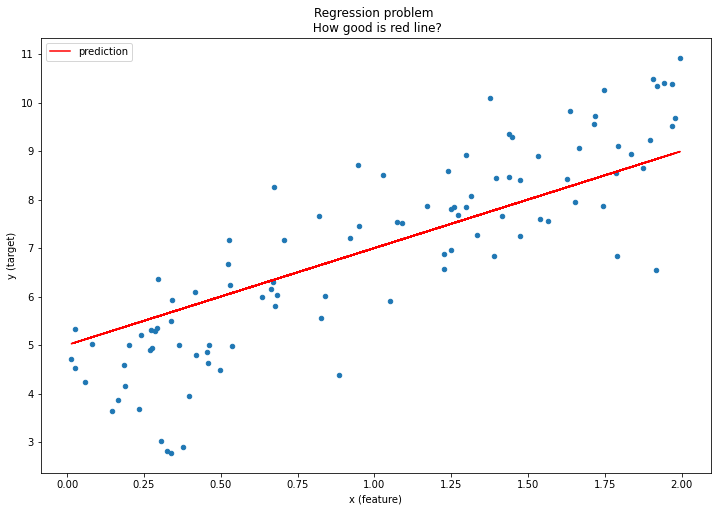

In [8]:
def predict(x):
    return 2 * x + 5

df.plot.scatter('x', 'y')
plt.title("Regression problem \n How good is red line?")
plt.xlabel("x (feature)")
plt.ylabel("y (target)")
plt.plot(x, predict(x), color='red', label='prediction')
plt.legend();

## RSS
Residual Sum of Squares

$$ RSS = \mathcal{L}(y, \hat{y}) = \sum_{i=1}^{n}(y_i - \hat{y}_i)^2 \rightarrow min$$

Метод наименьших квадратов.
Эта метрика была выбрана как функция, которую легко было минимизировать.  
После было доказано (теорема Гаусса Маркова), что она дает оптимальное решение (при определенных условиях, накладываемых на данные).  

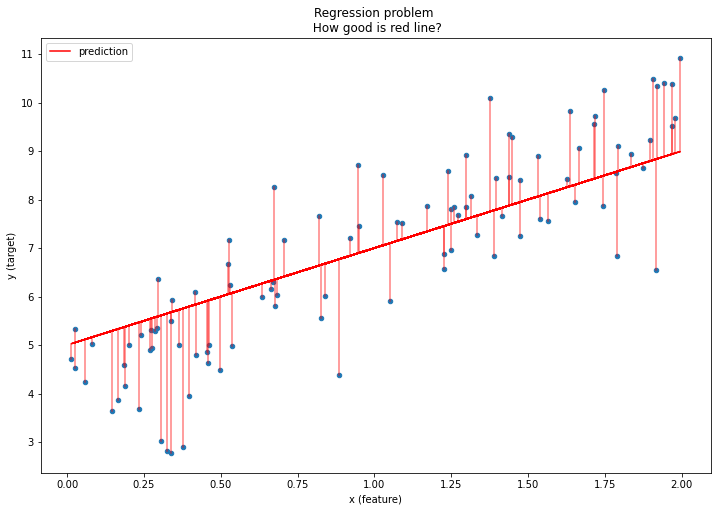

In [9]:
y_pred = predict(x)

df.plot.scatter('x', 'y')
plt.title("Regression problem \n How good is red line?")
plt.xlabel("x (feature)")
plt.ylabel("y (target)")
plt.plot(x, y_pred, color='red', label='prediction')
plt.legend()

for x_i, y_i, y_i_pred in zip(x, y, y_pred):
    plt.plot([x_i, x_i], [y_i_pred, y_i], color='red', alpha=0.5)


In [10]:
rss = ((y - y_pred) ** 2).sum()
print(rss)

130.32190271347974


In [11]:
rss = ((y - y_pred) ** 2).sum()
print(rss)

print(mean_squared_error(y, y_pred) * y.size)

130.32190271347974
130.32190271347974


В перезентацию

## Минимизация - $\beta_0$

$$ RSS = \mathcal{L}(y, \hat{y}) = \sum_{i=1}^{n}(y_i - \hat{y}_i)^2 \rightarrow min$$

$$  \frac{d\mathcal{L}}{d\beta_0} =  
\frac{d}{d\beta_0}(\sum_{i=1}^{n}(y_i - \hat{y}_i)^2) = 
\frac{d}{d\beta_0}(\sum_{i=1}^{n}(y_i - \hat{\beta_0} - \hat{\beta_1}x_i) ^ 2) =  
-2\sum_{i=1}^{n}(y_i - \hat{\beta_0} - \hat{\beta_1}x_i) = 0$$



$$ -\sum_{i=1}^{n}y_i +\sum_{i=1}^{n} \hat{\beta_0} +\sum_{i=1}^{n} \hat{\beta_1}x_i = 0$$

$$ n\hat{\beta}_0 = \sum_{i=1}^{n}y_i - \sum_{i=1}^{n} \hat{\beta_1}x_i $$

$$ \hat{\beta}_0 = \frac{ \sum_{i=1}^{n}y_i}{n} - \frac{\sum_{i=1}^{n} \hat{\beta_1}x_i}{n} $$

### Замечание

$$\overline{y} = \frac{ \sum_{i=1}^{n}y_i}{n}$$

$$\overline{x} = \frac{ \sum_{i=1}^{n}x_i}{n}$$

### Поэтому 

$$ \hat{\beta}_0 = \overline{y} - \hat{\beta_1}\overline{x} $$

## Минимизация - $\beta_1$

$$ RSS = \mathcal{L}(y, \hat{y}) = \sum_{i=1}^{n}(y_i - \hat{y}_i)^2 \rightarrow min$$

$$  \frac{d\mathcal{L}}{d\beta_1} =  
\frac{d}{d\beta_1}(\sum_{i=1}^{n}(y_i - \hat{y}_i)^2) = 
\frac{d}{d\beta_1}(\sum_{i=1}^{n}(y_i - \hat{\beta_0} - \hat{\beta_1}x_i) ^ 2) =  
-2\sum_{i=1}^{n}x_i(y_i - \hat{\beta_0} - \hat{\beta_1}x_i) = 0$$


### Подставим $\beta_0$

$$-2\sum_{i=1}^{n}x_i(y_i - \hat{\beta_0} - \hat{\beta_1}x_i) = 0$$

$$ \sum_{i=1}^{n}(x_iy_i - x_i\overline{y} + x_i\hat{\beta_1}\overline{x} - x_i\hat{\beta_1}x_i) = 0$$

$$ \sum_{i=1}^{n}((x_i y_i - x_i\overline{y}) + \hat{\beta_1}(x_i\overline{x} - x_i^2)) = 0$$

$$ \sum_{i=1}^{n}(x_iy_i - x_i\overline{y}) + \sum_{i=1}^{n}\hat{\beta_1}(x_i\overline{x} - x_i^2) = 0$$

$$ \hat{\beta_1}\sum_{i=1}^{n}(x_i^2 - x_i\overline{x}) = \sum_{i=1}^{n}(x_iy_i - x_i\overline{y}) $$

$$ \hat{\beta_1} = \frac{ \sum_{i=1}^{n}(x_iy_i - x_i\overline{y})}{\sum_{i=1}^{n}(x_i^2 - x_i\overline{x})} =
\frac{\sum_{i=1}^{n} x_iy_i - \sum_{i=1}^{n} x_i\overline{y}}{\sum_{i=1}^{n}x_i^2 - \sum_{i=1}^{n}x_i\overline{x}}$$

### Замечания

$$ n\overline{x}\overline{y} = \sum_{i=1}^{n}x_i\overline{y} = \sum_{i=1}^{n}y_i\overline{x} = \sum_{i=1}^{n}\overline{y}\overline{x}  $$

$$\sum_{i=1}^{n}x_i\overline{x} = \frac{n\overline{x}\sum_{i=1}^{n}x_i}{n} = n\overline{x}^2$$

### Поэтому

Числитель

$$ \sum_{i=1}^{n} x_iy_i - \sum_{i=1}^{n} x_i\overline{y} = \sum_{i=1}^{n} x_iy_i - \sum_{i=1}^{n} x_i\overline{y} + n\overline{x}\overline{y} - n\overline{x}\overline{y} =
\sum_{i=1}^{n} x_iy_i - \sum_{i=1}^{n} x_i\overline{y} + \sum_{i=1}^{n}\overline{x}\overline{y} - \sum_{i=1}^{n}\overline{x}y_i = 
\sum_{i=1}^{n} (x_iy_i - x_i\overline{y} + \overline{x}\overline{y} - \overline{x}y_i) =
\sum_{i=1}^{n}((x_i - \overline{x}) (y_i - \overline{y}))
$$

Знаменатель

$$\sum_{i=1}^{n}x_i^2 - \sum_{i=1}^{n}x_i\overline{x} = 
\sum_{i=1}^{n}(x_i^2 - x_i\overline{x}) =
\sum_{i=1}^{n}(x_i^2 - x_i\overline{x} - x_i\overline{x} + x_i\overline{x}) =
\sum_{i=1}^{n}(x_i^2 - 2x_i\overline{x} + x_i\overline{x}) = 
\sum_{i=1}^{n}(x_i^2 - 2x_i\overline{x} + \overline{x}^2) = 
\sum_{i=1}^{n}(x_i - \overline{x})^2
$$

## В итоге

$$ \hat{\beta}_0 = \overline{y} - \hat{\beta_1}\overline{x} $$

$$ \hat{\beta_1} = \frac{\sum_{i=1}^{n}((x_i - \overline{x}) (y_i - \overline{y}))}{\sum_{i=1}^{n}(x_i - \overline{x})^2} $$

In [12]:
def estimate(x, y):
    y_av = y.mean()
    x_av = x.mean()
    
    b1 = ((x - x_av) * (y - y_av)).sum() / ((x - x_av) ** 2).sum()
    b0 = y_av - b1 * x_av
    
    return b0, b1

def predict_estimated(x, b0, b1):
    return b0 + x * b1

In [13]:
b0, b1 = estimate(x, y)

In [14]:
b0, b1

(4.062234536065333, 2.869690173439215)

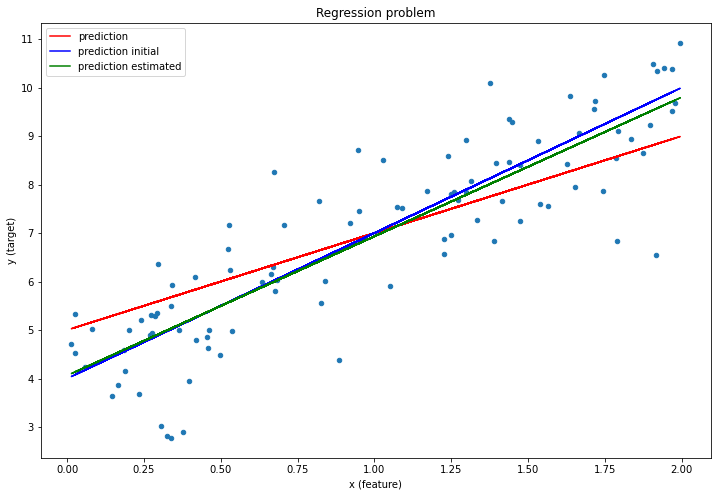

In [15]:
df.plot.scatter('x', 'y')
plt.title("Regression problem")
plt.xlabel("x (feature)")
plt.ylabel("y (target)")
plt.plot(x, predict(x), color='red', label='prediction')
plt.plot(x, predict_estimated(x, 4, 3), color='blue', label='prediction initial')
plt.plot(x, predict_estimated(x, b0, b1), color='green', label='prediction estimated')
plt.legend();

In [16]:
print("estimated values: b0 = {}, b1 = {}".format(b0, b1))
print("initial values: b0 = 4, b1 = 3")

estimated values: b0 = 4.062234536065333, b1 = 2.869690173439215
initial values: b0 = 4, b1 = 3


In [18]:
x_dummy = np.hstack([x, np.ones(x.shape[0]).reshape(-1, 1)])
b1, b = np.linalg.lstsq(x_dummy, y)[0]
print(b1, b)

[2.86969017] [4.06223454]


## Множественная регрессия

### Предсказание 
$$ \hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_p x_p $$

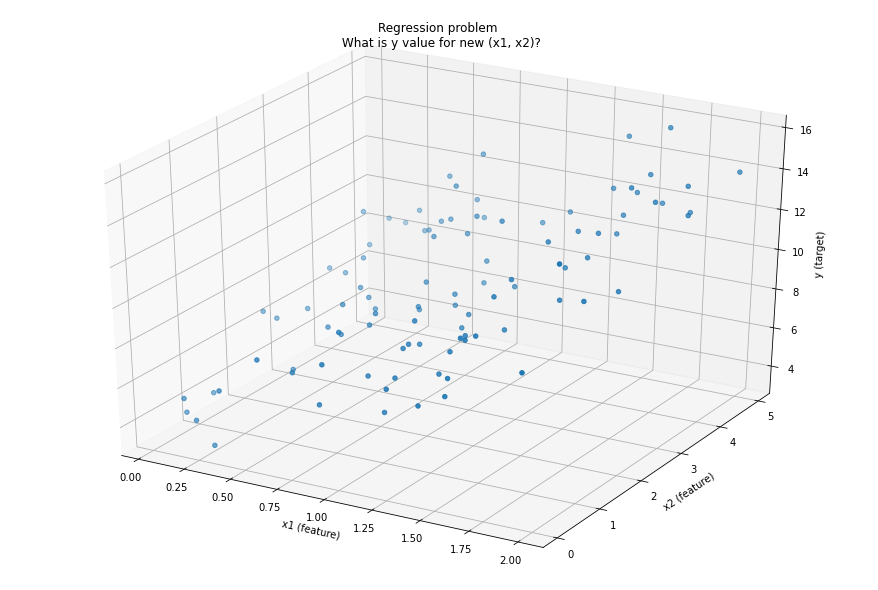

In [19]:
plt.rcParams["figure.figsize"] = [12, 8]
fig=plt.figure()
ax = Axes3D(fig)

x1 = 2 * np.random.rand(100, 1)
x2 = 5 * np.random.rand(100, 1)

# y = 4 + 3*x_1 + 1*x_2
y = 4 + 3 * x1 + x2 + np.random.randn(100, 1)

ax.scatter(x1, x2, y, marker='o')
ax.set_title("Regression problem \n What is y value for new (x1, x2)?")
ax.set_xlabel("x1 (feature)")
ax.set_ylabel("x2 (feature)")
ax.set_zlabel("y (target)")
plt.show()

В перезентацию

## Матричная форма 

Введем $x_0$ - вектор единиц:

$$ x = \begin{bmatrix} 1 & x_{11} & ... & x_{p1} \\ 1 & x_{12} & ... & x_{p2} \\ ... & ... & ... & ... \\ 1 & x_{n1} & ... & x_{n1}
\end{bmatrix} \quad 
\theta = \begin{bmatrix} \theta_0 \\ \theta_1 \\ ... \\ \theta_p \end{bmatrix} \quad 
y = \begin{bmatrix} y_1 \\ y_2 \\ ... \\ y_n \end{bmatrix} $$

$$x\theta = y$$

$$x_{n\cdot p}\cdot\theta_{p\cdot 1} = y_{n\cdot 1} $$


$$ RSS = \mathcal{L}(y, \hat{y}) = \sum_{i=1}^n (y_i - x_i^T\theta)^2 = \\= 
(y_1 - x_1^T\theta)^2 + (y_2 - x_2^T\theta)^2 + ... + (y_n - x_n^T\theta)^2 = \\
=[y_1 - x_1^T\theta, y_2 - x_2^T\theta, ..., y_n - x_n^T\theta]
\begin{bmatrix} y_1 - x_1^T\theta \\ y_2 - x_2^T\theta \\ ... \\ y_n - x_n^T\theta \end{bmatrix} = \\
= (y-x\theta)^T(y-x\theta)
$$

### Производная по матрице

http://www.machinelearning.ru/wiki/images/2/2a/Matrix-Gauss.pdf  
http://nabatchikov.com/blog/view/matrix_der

Здесь под производной скалярной функции $f(x)$ по вектору x понимается градиент
$$ \frac{df(x)}{dx} = [ \frac{df(x)}{dx_1}, . . . , \frac{df(x)}{dx_d}]^T $$

Свойства, которые понадобятся далее:

$$\frac{dx^TA}{dx} = \frac{dA^Tx}{dx} = A$$

$$\frac{dx^TAx}{dx} = 2Ax$$

Приравниваем производную к нулю

$$\frac{d\mathcal{L}}{d\theta} = \frac{d}{d\theta} (y-x\theta)^T(y-x\theta) = \\
= \frac{d}{d\theta} (y^T-(x\theta)^T)(y-x\theta) = \\ 
= \frac{d}{d\theta}( (y^T-(x\theta)^T)y - (y^T-(x\theta)^T)(x\theta)) = \\ 
= \frac{d}{d\theta}(y^Ty-(x\theta)^Ty - y^Tx\theta + (x\theta)^Tx\theta) = \\ 
= \frac{d}{d\theta}(y^Ty-\theta^Tx^Ty - y^Tx\theta + \theta^Tx^Tx\theta) = \\ 
= \frac{d}{d\theta}(y^Ty)-\frac{d}{d\theta}(\theta^T(x^Ty)) - \frac{d}{d\theta}((y^Tx)\theta) + \frac{d}{d\theta}(\theta^T(x^Tx)\theta) = \\ 
= 0-x^Ty - x^Ty + 2x^Tx\theta = -2x^Ty + 2x^Tx\theta = 0\\ 
$$

$$x^Tx\theta=x^Ty$$
$$(x^Tx)^{-1}x^Tx\theta=(x^Tx)^{-1}x^Ty$$
$$\theta=(x^Tx)^{-1}x^Ty$$

In [20]:
x = np.hstack([np.ones(x1.shape[0]).reshape(-1, 1), x1, x2])

w = la.inv(x.T.dot(x)).dot(x.T).dot(y) 
print(w)

[[3.93169283]
 [2.95528948]
 [1.05187977]]


In [21]:
def predict_estimated(x, w):
    return x.dot(w)

def plane(x1, x2):
    return 4 + x1 * 3 + x2

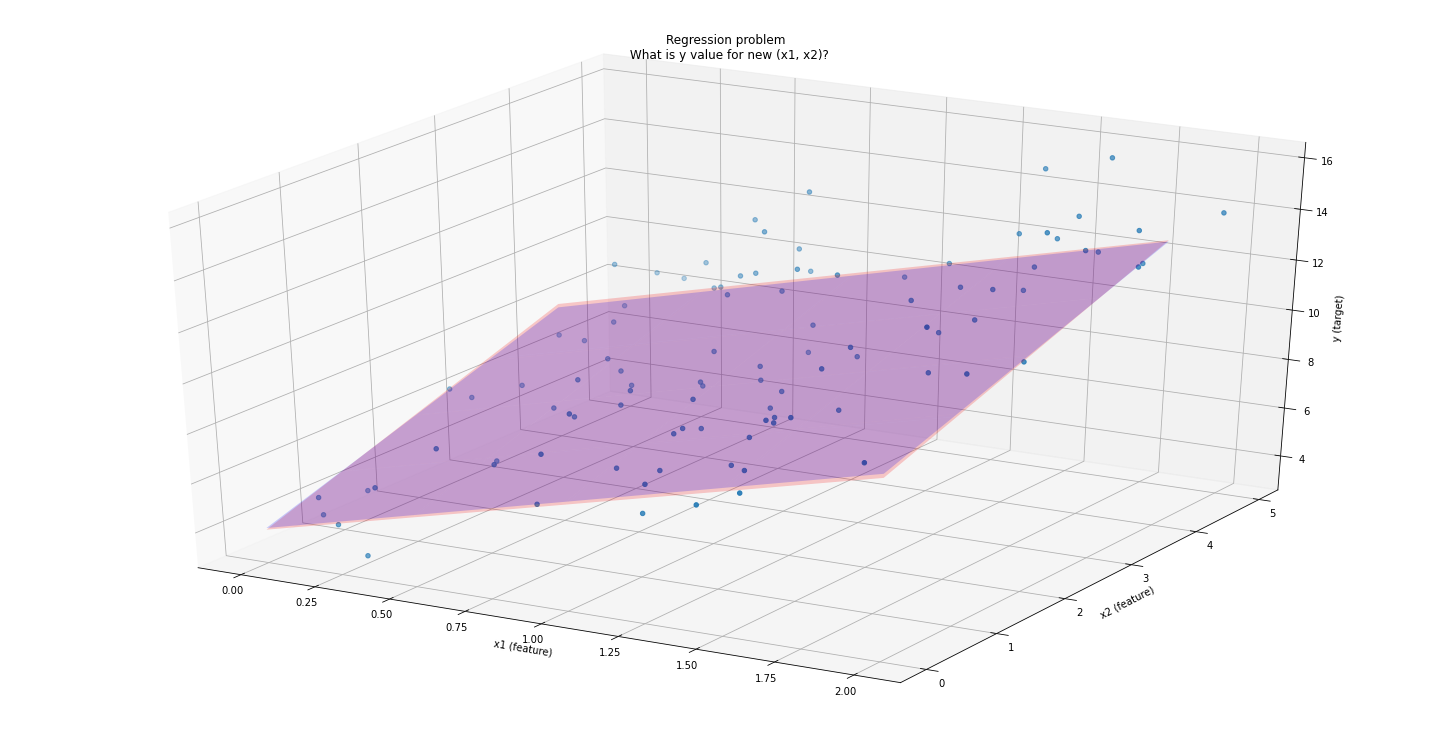

In [25]:
fig=plt.figure(figsize=(20, 10))
ax = Axes3D(fig)

x1_surfs = np.arange(0, 2.5, 0.5)
x2_surfs = np.arange(0, 5.0, 1)
x1_surf, x2_surf = np.meshgrid(x1_surfs, x2_surfs)

zs = np.array([plane(x_i, y_i) for x_i, y_i in zip(np.ravel(x1_surf), np.ravel(x2_surf))])
z = zs.reshape(x1_surf.shape)
ax.plot_surface(x1_surf, x2_surf, z, alpha=0.2, color='blue')

zs_pred = np.array([predict_estimated(np.array([[1, x_i, y_i]]), w) for x_i, y_i in zip(np.ravel(x1_surf), np.ravel(x2_surf))])
z_predicted = zs_pred.reshape(x1_surf.shape)
ax.plot_surface(x1_surf, x2_surf, z_predicted, alpha=0.2, color='red')
ax.scatter(x1, x2, y, marker='o')

ax.set_title("Regression problem \n What is y value for new (x1, x2)?")
ax.set_xlabel("x1 (feature)")
ax.set_ylabel("x2 (feature)")
ax.set_zlabel("y (target)")

plt.show()

In [26]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(np.hstack([x1, x2]), y)
print("Intercept: {:.4f} \nSlopes: {}\n".format(lin_reg.intercept_[0], lin_reg.coef_[0]))
y_pred = lin_reg.predict(np.hstack([x1, x2]))
print("Predictions\n", np.hstack([y_pred, y])[:10])
print("\nMSE: {:.4f}".format(mean_squared_error(y_pred, y)))

Intercept: 3.9317 
Slopes: [2.95528948 1.05187977]

Predictions
 [[11.18427018 12.1474554 ]
 [ 9.98553926 10.31628669]
 [11.7059878  10.72589214]
 [ 7.99012848  7.62669298]
 [ 9.69312359  8.94200363]
 [ 9.80866978  9.67392266]
 [11.30267323 11.25057373]
 [ 8.11109538  8.74587555]
 [ 7.67118667  8.49949012]
 [10.34219154 11.76407353]]

MSE: 0.8908


## Вычислительная сложность 

Вычисляется матрица $(x^Tx)^{-1}$ размера $p \times p$, где $p$ - количество признаков (feature). 
Вычислитальная сложность обратной матрицы обычно от $O(n^{2.4})$ до $O(n^3)$

При удвоении количества признаков время на вычисления нужно умножить на от $2^{2.4} = 5.3$ до $2^3 = 8$.

Рассчет становится очень медленным, когда количество признаков очень большое - например, 100,000

При этом рассчет линеен по отношению к количеству элементов выборки ($O(n)$). Т.о. можно эффективно обрабатывать большие наборы данных, если они помещаются в оперативную память.

При этом предсказание очень быстрое и зависит только от количества объектов, по которым необходимо рассчитать значение.

# Полиномиальная регрессия


### Вопрос

Можно ли обощить линейную регрессию на нелинейный случай?

In [29]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

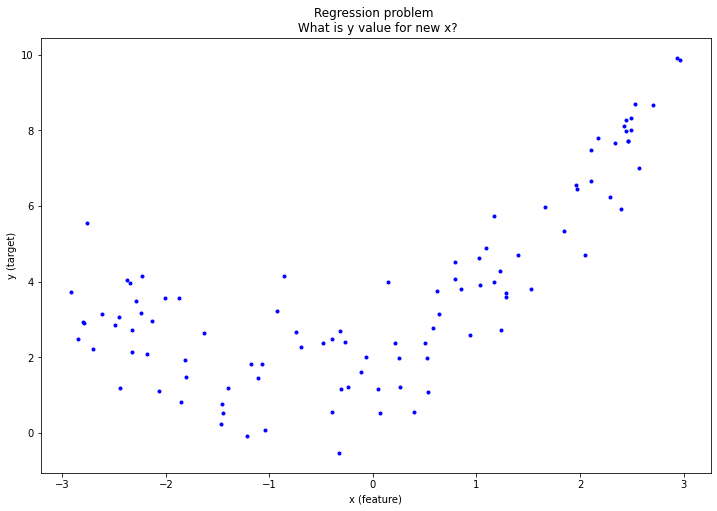

In [30]:
plt.plot(X, y, "b.")
plt.title("Regression problem \n What is y value for new x?")
plt.xlabel("x (feature)")
plt.ylabel("y (target)");

Расширим пространство гипотез до всех полиномов степени $p$. 

$$ \hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_p x_p + \theta_{12} x_1^2 + \theta_{22} x_1x_2 + ... + \theta_{p2} x_1x_p + ... + \theta_{pp} x_p^2 + ... $$

In [31]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

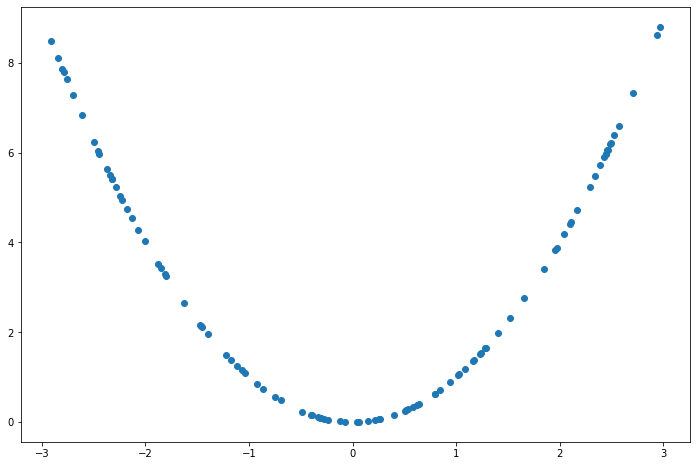

In [35]:
plt.scatter(X_poly[:, 0], X_poly[:, 1]);

In [36]:
X[0]

array([2.28980611])

In [38]:
X[0] **2 

array([5.243212])

In [37]:
X_poly[0]

array([2.28980611, 5.243212  ])

$$ \hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_1^2$$

In [39]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.97623422]), array([[0.99908487, 0.55857678]]))

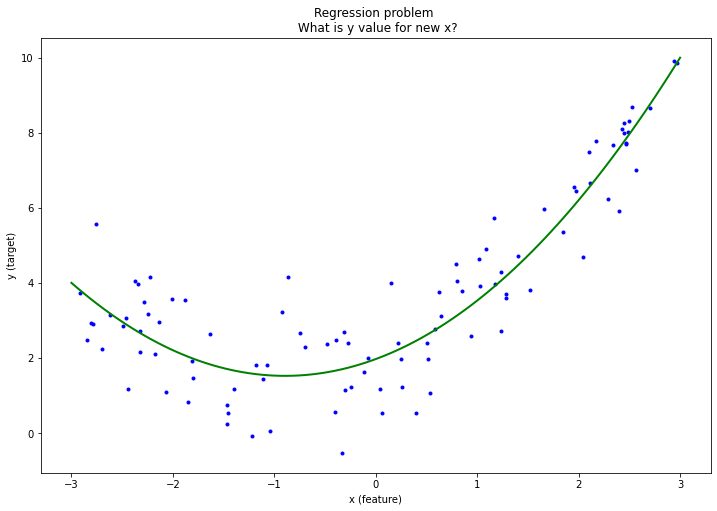

In [40]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "g-", linewidth=2, label="Predictions")
plt.title("Regression problem \n What is y value for new x?")
plt.xlabel("x (feature)")
plt.ylabel("y (target)");

## Проблема переобучения

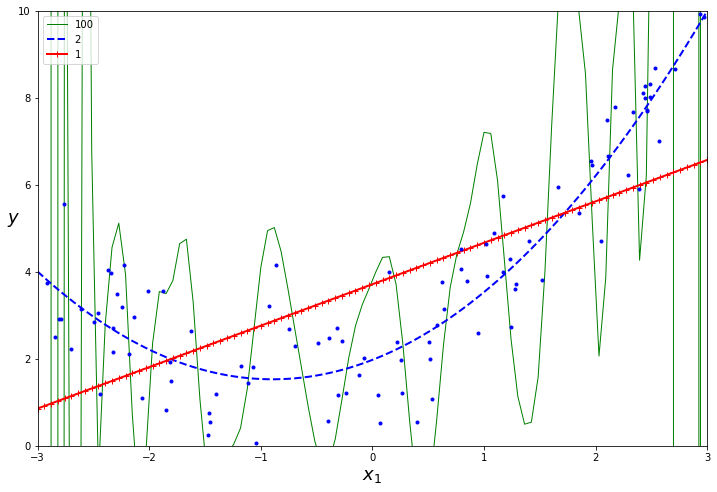

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 100), ("b--", 2, 2), ("r-+", 2, 1)):
    
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    
    std_scaler = StandardScaler()
    
    lin_reg = LinearRegression()
    
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

### Упражнение.
Предположим, мы получили несколько одинаковых по качеству моделей линейной регрессии. Какую из этих моделей стоит выбрать?

## Регуляризация

$$ RSS = \mathcal{L}(y, \theta, x) = \sum_{i=1}^{n}(y_i - x_i^T\theta)^2 + \alpha R(\theta) \rightarrow min $$

## Гребневая регрессия (Ridge regression, регуляризация Тихонова, $L^2$-регуляризация)




$$ RSS = \mathcal{L}(y, \theta, x) = \sum_{i=1}^{n}(y_i - x_i^T\theta)^2 + \alpha \sum_{i=1}^{n} \theta_i^2 \rightarrow min $$

### Замечание 
$\theta_0$ не участвует в регрессии, так как нужна возможность провести гиперплоскость с любым сдвигом.

Снова будем использовать свойство

$$\frac{dx^TAx}{dx} = 2Ax$$

$$\frac{d\mathcal{L}}{d\theta} = \frac{d}{d\theta} (y-x\theta)^T(y-x\theta) +  \frac{d}{d\theta} \alpha\theta^T\theta = \\
= -2x^Ty + 2x^Tx\theta + 2\alpha \theta = 0$$

$$ x^Tx\theta + \alpha \theta = x^Ty $$
$$ (x^Tx + \alpha E) \theta = x^Ty $$

$E$ - единичная диагональная матрица

$$ (x^Tx + \alpha E)^{-1} (x^Tx + \alpha E)\theta = (x^Tx + \alpha E)^{-1} x^Ty $$

$$ \theta = (x^Tx + \alpha E)^{-1} x^Ty $$

In [42]:
from sklearn.linear_model import Ridge

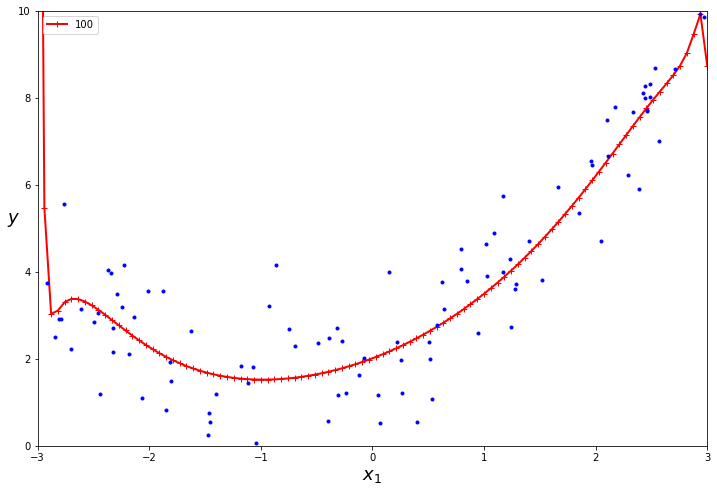

In [43]:
polybig_features = PolynomialFeatures(degree=100, include_bias=False)

std_scaler = StandardScaler()

ridge_reg = Ridge(alpha=1)

polynomial_regression = Pipeline([
        ("poly_features", polybig_features),
        ("std_scaler", std_scaler),
        ("ridge_reg", ridge_reg),
    ])

polynomial_regression.fit(X, y)
y_newbig = polynomial_regression.predict(X_new)
plt.plot(X_new, y_newbig, style, label=str(100), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [44]:
ridge_reg.coef_[0]

array([ 1.71451843e+00,  1.26739492e+00,  1.94919181e-01,  3.86763221e-01,
       -2.17563295e-01,  1.27284027e-01, -1.33696006e-01, -5.74478949e-02,
       -1.41046583e-02, -1.38222156e-01,  4.67317401e-02, -1.41441129e-01,
        5.88324945e-02, -1.07271419e-01,  4.63440224e-02, -6.33845484e-02,
        2.66863606e-02, -2.40386259e-02,  9.17397877e-03,  5.25533917e-03,
       -2.46543538e-03,  2.37075872e-02, -7.66577245e-03,  3.27088090e-02,
       -7.37850288e-03,  3.44157048e-02, -3.10310409e-03,  3.10333422e-02,
        3.62810951e-03,  2.44934935e-02,  1.14892538e-02,  1.63451686e-02,
        1.94443487e-02,  7.75140427e-03,  2.67495014e-02, -4.66439421e-04,
        3.29175641e-02, -7.76813419e-03,  3.76696467e-02, -1.38334501e-02,
        4.08861459e-02, -1.85074795e-02,  4.25631590e-02, -2.17548815e-02,
        4.27763767e-02, -2.36232075e-02,  4.16525978e-02, -2.42144235e-02,
        3.93480930e-02, -2.36633714e-02,  3.60327161e-02, -2.21218723e-02,
        3.18786259e-02, -

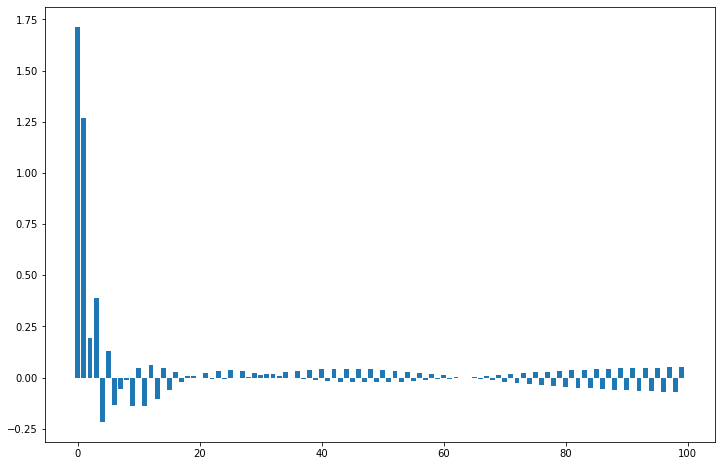

In [45]:
plt.bar(x=range(len(ridge_reg.coef_[0])),height=ridge_reg.coef_[0]);

### Замечание

Гребнем является диагональная матрица, которую мы прибавляем к матрице $X^TX$ с линейнозависимыми колонками, в результате получаемая матрица не сингулярна (не имеет линейно зависимых строк и столбцов).

## Лассо регрессия (Least Absolute Shrinkage and Selection Operator Regression, Lasso regression, $L^1$-регуляризация)

$$ RSS = \mathcal{L}(y, \theta, x) = \sum_{i=1}^{n}(y_i - x_i^T\theta)^2 + \alpha \sum_{i=1}^{n} |\theta_i| \rightarrow min $$

Сумма модулей весов

### Замечание

$$|x|' = \frac{x}{|x|} = sign(x)$$


$$ \frac {d\mathcal{L}}{d\theta_i} = 2 \sum_{i=1}^{n} ((y_i - x_i^T\theta)x_i) + \alpha sign(\theta_i)
$$

Такая задача не имеет решения в явном виде, для ее решения будем использовать градиентный спуск.
Важно делать нормализацию признаков.

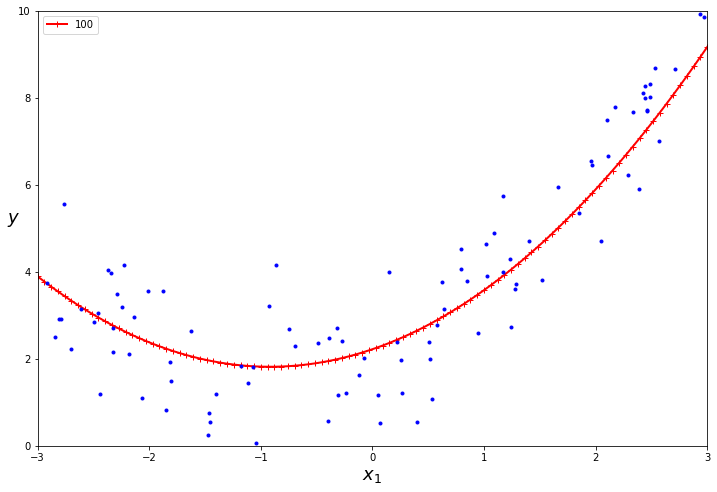

In [46]:
from sklearn.linear_model import Lasso

polybig_features = PolynomialFeatures(degree=100, include_bias=False)

std_scaler = StandardScaler()

lasso_reg = Lasso(alpha=0.2)

polynomial_regression = Pipeline([
        ("poly_features", polybig_features),
        ("std_scaler", std_scaler),
        ("lasso_reg", lasso_reg),
    ])

polynomial_regression.fit(X, y)
y_newbig = polynomial_regression.predict(X_new)
plt.plot(X_new, y_newbig, style, label=str(100), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [47]:
lasso_reg.coef_

array([1.55168984, 1.27515719, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

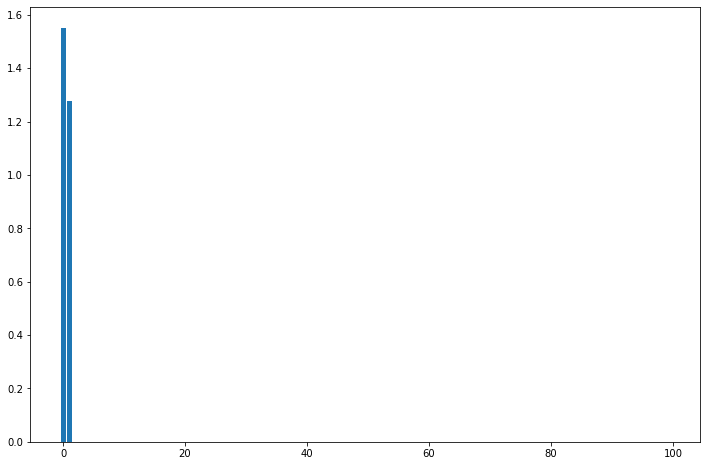

In [48]:
plt.bar(x=range(len(lasso_reg.coef_)),height=lasso_reg.coef_);

### Замечание 
Важная характеристика Лассо регрессии - устранение наименее важных признаков (обнуление их весов).
Происходит автоматический выбор признаков и получается разреженная модель (несколько ненулевых весов)

## Elastic Net

$$ RSS = \mathcal{L}(y, \theta, x) = \sum_{i=1}^{n}(y_i - x_i^T\theta)^2 +r \alpha \sum_{i=1}^{n} |\theta_i| + \frac{1-r}{2} \alpha \sum_{i=1}^{n} \theta_i^2 \rightarrow min $$

Всегда следует делать регуляризацию. То есть следует избегать обычной линейной регрессии. 
Если есть знание, что часть признаков не важны, то используется Lasso или Elastic Net. 
Если признаки скоррелированы или количество признаков больше количества примеров, то лучше использовать Elastic Net или Ridge. 

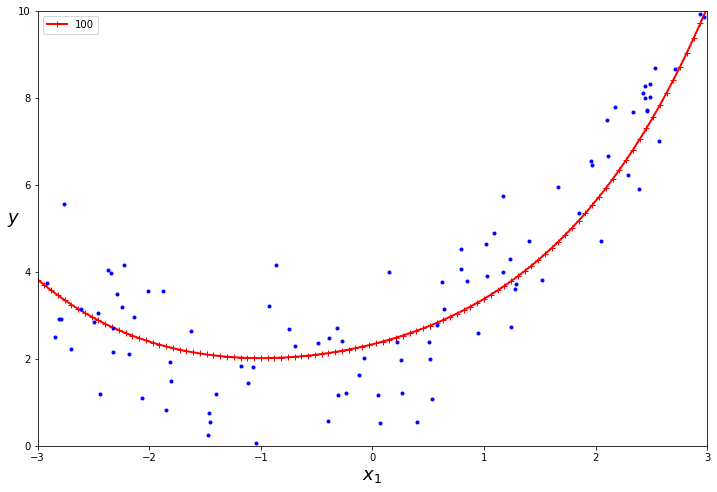

In [49]:
from sklearn.linear_model import ElasticNet

polybig_features = PolynomialFeatures(degree=100, include_bias=False)

std_scaler = StandardScaler()

elastic_reg = ElasticNet(alpha=0.2)

polynomial_regression = Pipeline([
        ("poly_features", polybig_features),
        ("std_scaler", std_scaler),
        ("elastic_reg", elastic_reg),
    ])

polynomial_regression.fit(X, y)
y_newbig = polynomial_regression.predict(X_new)
plt.plot(X_new, y_newbig, style, label=str(100), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [50]:
elastic_reg.coef_

array([ 1.13335665,  0.91784242,  0.39781314,  0.38065679,  0.0427975 ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

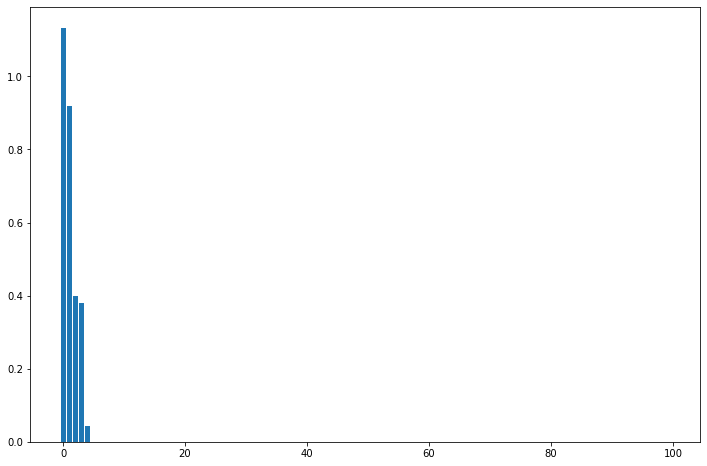

In [52]:
plt.bar(x=range(len(elastic_reg.coef_)),height=elastic_reg.coef_);

https://habrahabr.ru/company/ods/blog/322076/  
Aurélien Géron - Hands-on Machine Learning with Scikit-Learn and TensorFlow

## Дополнительные материалы:
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
- http://www.ccas.ru/voron/download/Regression.pdf
- https://bamboo.nes.ru/cb.cgi/attachdownload/topic1.pdf?page=Materials&file=topic1.pdf
- http://www.machinelearning.ru/wiki/images/2/2a/Matrix-Gauss.pdf
- http://nabatchikov.com/blog/view/matrix_der